# Теория нейронных сетей. Модульная контрольная работа.

Выполняйте решение в colab-файле. Укажите ваше ФИО.

ФИО: Самойлов Александр Павлович


Набор данных **Most Streamed Spotify Songs 2023** содержит обширный список наиболее известных песен 2023 года, как это указано на Spotify. Он предоставляет информацию о характеристиках каждой песни, её популярности и наличии на различных музыкальных платформах. Набор включает информацию, такую как название трека, имя(имена) исполнителя(ей), дата выпуска, наличие в плейлистах и чартах Spotify, статистика прослушиваний, наличие на Apple Music, Deezer, чартах Shazam и различные аудио-характеристики.

# Параметры набра данных:

* **track_name**: Name of the song
* **artist(s)_name**: Name of the artist(s) of the song
* **artist_count**: Number of artists contributing to the song
* **released_year**: Year when the song was released
* **released_month**: Month when the song was released
* **released_day**: Day of the month when the song was released
* **in_spotify_playlists**: Number of Spotify playlists the song is included in
* **in_spotify_charts**: Presence and rank of the song on Spotify charts
* **streams**: Total number of streams on Spotify
* **in_apple_playlists**: Number of Apple Music playlists the song is included in
* **in_apple_charts**: Presence and rank of the song on Apple Music charts
* **in_deezer_playlists**: Number of Deezer playlists the song is included in
* **in_deezer_charts**: Presence and rank of the song on Deezer charts
* **in_shazam_charts**: Presence and rank of the song on Shazam charts
* **bpm**: Beats per minute, a measure of song tempo
* **key**: Key of the song
* **mode**: Mode of the song (major or minor)
* **danceability_%**: Percentage indicating how suitable the song is for dancing
* **valence_%**: Positivity of the song's musical content
* **energy_%**: Perceived energy level of the song
* **acousticness_%**: Amount of acoustic sound in the song
* **instrumentalness_%**: Amount of instrumental content in the song
* **liveness_%**: Presence of live performance elements
* **speechiness_%**: Amount of spoken words in the song

**Цель работы: с помощью логистической регрессии предсказать, попадёт ли музыка в топ-чарты платформы Spotify, основываясь на других данных о музыке.**

## Загрузка исходных данных

In [ ]:
# Загрузка данных
!apt-get install -y git
!git clone https://github.com/Kitsumetri/DatasetSpotifyForHSE.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
fatal: destination path 'DatasetSpotifyForHSE' already exists and is not an empty directory.


In [ ]:
# Импортирование нужных для работы библиотек
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('DatasetSpotifyForHSE/spotify-2023.csv', encoding='latin', delimiter=',') # загружаем данные в dataframe

# Задание 1 (1 балл):
* Вывести на экран число записей (строк) и столбцов в наборе. Вывести 12 первых строк набора в ввиде таблицы.

In [ ]:
# Ваш код здесь

#Определим сколько строк и столбцов
num_rows, num_columns = df.shape
print(f"Число записей (строк): {num_rows}")
print(f"Число столбцов: {num_columns}")

df.head(12)

Число записей (строк): 953
Число столбцов: 24


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


# Задание 2 (2 балла):

**Очистка и препроцессинг данных**
* Выведите информацию о наборе данных, подумайте, какие невалидные столбцы есть в наборе.
* Столбец '**mode**' представить в виде бинарных значений: 0 - Major / 1 - Minor.
* Столбцы, содержащие в основном числа перевести в числовой тип. Если присутствуют нечисловые значения - заменить их на 0.
* Отбросить все остальные нечисловые данные и столбцы '**streams**', '**artist_count**'.
* Столбец '**in_spotify_charts**' содержит указания учителя для обучения логистической регрессии. Представьте данные в нем в виде бинарных значений. Если число в столбце != 0, то 1, иначе 0.
* Выведите на экран информацию об изменённом наборе данных. Все столбцы должны иметь числовой тип.

In [ ]:
#Выведем информацию о наборе данных
print(df.info())
#Нужно поработать и разобраться со значениями в столбцах с типом object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
# Ваш код здесь

# Сначала представляем значения в столбце
df['mode'] = df['mode'].map({'Major': 0, 'Minor': 1})

# Напишем функцию для приведения типов к числовым типам
def str_to_numeric(n: str):
  try:
    if ',' in n:
      n = np.float64(n.replace(',','.'))
    else:
      n = np.int64(n)
  except:
    n = n
  return n

#Применим функцию ко всем столбцам
for c in df.columns:
  df[c] = df[c].apply(str_to_numeric)

#Столбцы, содержащие в основном числа переводим в числовой тип. Если присутствуют нечисловые значения - заменить их на 0.
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

#Отбрасываем все нечисловые столбцы, streams и artist_count
df = df.select_dtypes(include=[np.number])
df.drop('artist_count', axis=1, inplace=True) #У stereams слишком большие значения, поэтому он просто сразу не обработался, второй раз нет смысла его удалять

#Представляем данные в столбце указаний учителя в бинарном виде через лямбда функцию
df['in_spotify_charts'] = df['in_spotify_charts'].apply(lambda x: 1 if x != 0 else 0)

#Выводим измененную информацию на экран и еще раз таблицу, чтобы визуально посмотреть, что все хорошо
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released_year         953 non-null    int64  
 1   released_month        953 non-null    int64  
 2   released_day          953 non-null    int64  
 3   in_spotify_playlists  953 non-null    int64  
 4   in_spotify_charts     953 non-null    int64  
 5   in_apple_playlists    953 non-null    int64  
 6   in_apple_charts       953 non-null    int64  
 7   in_deezer_playlists   953 non-null    float64
 8   in_deezer_charts      953 non-null    int64  
 9   in_shazam_charts      953 non-null    float64
 10  bpm                   953 non-null    int64  
 11  mode                  953 non-null    int64  
 12  danceability_%        953 non-null    int64  
 13  valence_%             953 non-null    int64  
 14  energy_%              953 non-null    int64  
 15  acousticness_%        9

,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023,7,14,553,1,43,263,45.0,10,826.0,125,0,80,89,83,31,0,8,4
1,2023,3,23,1474,1,48,126,58.0,14,382.0,92,0,71,61,74,7,0,10,4
2,2023,6,30,1397,1,94,207,91.0,14,949.0,138,0,51,32,53,17,0,31,6
3,2019,8,23,7858,1,116,207,125.0,12,548.0,170,0,55,58,72,11,0,11,15
4,2023,5,18,3133,1,84,133,87.0,15,425.0,144,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,2022,11,3,953,0,61,13,37.0,1,0.0,144,0,60,24,39,57,0,8,3
949,2022,10,21,1180,0,4,0,8.0,0,0.0,166,0,42,7,24,83,1,12,6
950,2022,11,3,573,0,2,0,7.0,0,0.0,92,0,80,81,67,4,0,8,6
951,2022,10,20,1320,0,29,26,17.0,0,0.0,97,0,82,67,77,8,0,12,5


# Задание 3 (1 балл):
* Разделить таблицу на признаки и указания учителя (target).
* Вывести размер признаков и указаний учителя.

In [ ]:
#Определим столбец 'in_spotify_charts' как целевую переменную (target)
target = df['in_spotify_charts']

#Определим остальные числовые столбцы как признаки (features)
features = df.drop('in_spotify_charts', axis=1)

#Выведем размер признаков и указаний учителя
print("Размер признаков (features):", features.shape)
print("Размер целевой переменной (target):", target.shape)


# Проверка наличия отсутствующих значений (NaN) в признаках (features)
missing_features = features.isna().any().any()

# Проверка наличия отсутствующих значений (NaN) в целевой переменной (target)
missing_target = target.isna().any()

if not missing_features :
    print("Отсутствующих значений (NaN) в признаках нет.")
else:
    print("Обнаружены отсутствующие значения в данных.")
if not missing_target :
    print("Отсутствующих значений (NaN) в целе нет.")
else:
    print("Обнаружены отсутствующие значения в целе.")



Размер признаков (features): (953, 18)
Размер целевой переменной (target): (953,)
Отсутствующих значений (NaN) в признаках нет.
Отсутствующих значений (NaN) в целе нет.


# Задание 4 (4 балла):
* Разделить данные на обучающие и тестовые данные, размер тестовых **25%** от исходных, **random_state=0**.
* Создайте логистическую регрессию. Задайте аргумент **random_state=0**, что позволит использовать одинаковые "случайности". Задайте число итераций обучения побольше (2000).
* Обучите модель
* Посчитайте выходы в переменную **y_pred** для тестовых данных.

In [ ]:
# Ваш код здесь

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Разделение данных на признаки (features) и целевую переменную (target)

X = features
y = target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Создадим логистической регрессии с числом итераций 2000 и random_state=0
logistic_reg = LogisticRegression(max_iter=2000, random_state=0)

# Обучим модель на обучающих данных
logistic_reg.fit(X_train, y_train)

# Получим прогнозы для тестовых данных
y_pred = logistic_reg.predict(X_test)

# Задание 5 (1 балл):
* Посчитайте и выведите аккуратность предсказания с помощью метода **accuracy_score** из **sklearn.metrics**.
* Посчитайте матрицу потерь и выведите её. Команда **confusion_matrix** из того же модуля.

*Внимание: аккуратность должна получиться более 70%.*

In [ ]:
# Ваш код здесь
from sklearn.metrics import accuracy_score, confusion_matrix

# Вычислим аккуратность
accuracy = accuracy_score(y_test, y_pred)
print("Аккуратность:", accuracy)

# Вычисленим матрицу ошибок
confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(confusion)

Аккуратность: 0.7656903765690377
Матрица ошибок:
[[ 81  21]
 [ 35 102]]


# Задание 6 (1 балл):
* Выведите на экран график весов модели (индекс веса - значение веса).
* Добавьте красную точку для каждого из весов модели, подпишите её названием признака.
* Добавьте сетку, подпишите оси графика: X - Weight Index, Y - Weight value
* Сделайте график размера 16 дюймов в ширину и 7 дюймов в высоту.

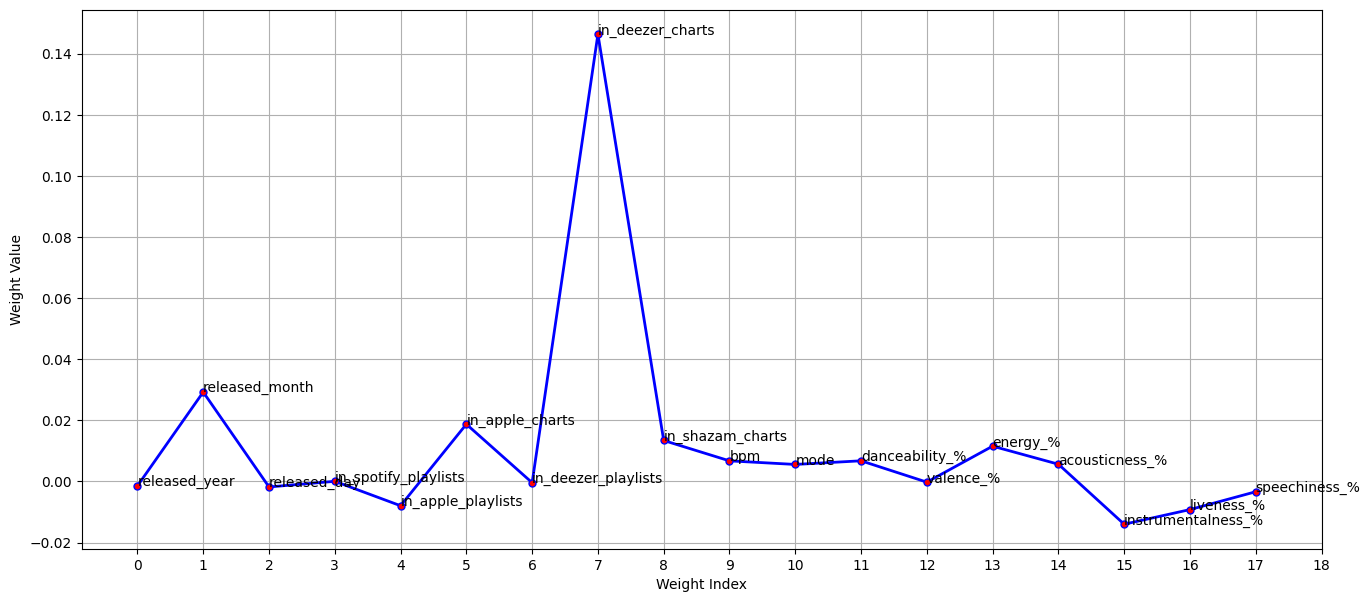

In [ ]:
import matplotlib.pyplot as plt

# Получение весов модели (коэффициентов)
weights = logistic_reg.coef_[0]

# Создание индексов весов
weight_indices = range(len(weights))

# Создание графика
plt.figure(figsize=(16, 7))
plt.plot(weight_indices, weights, marker='o', linestyle='-', color='b', markersize=5, linewidth=2, markerfacecolor='r')

# Добавление подписей к весам
feature_names = features.columns
for i, name in enumerate(feature_names):
    plt.annotate(name, (weight_indices[i], weights[i]), color='black')

# Добавление сетки и подписей осей
plt.grid()
plt.xticks(range(0, 19))
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')

# Отображение графика
plt.show()


# Отправка решения

Баллы за последующие задания выставляются только при правильном выполнении предыдущих.

Внимательно проверьте ваше решение. Отправьте решение на проверку, указав ссылку на ваш colab-файл. Обязательно настройте доступ к файлу. Не изменяйте файл после отправки.

Разрешается использование материалов семинаров. Запрещается списывание. Приветствуются комментарии к выполняемым действиям. В вашем решении не должно быть постороннего кода, ненужного для выполнения заданий.

Форма для отправки решения:
https://docs.google.com/forms/d/e/1FAIpQLScuV_qLdDSZSX3oVZUKUxfR_2xF9dcW7bmCnH2Fedzc3r60QA/viewform